Found 3937 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found classes: ['NORMAL', 'PNEUMONIA']


C:\Users\niles\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Training the model ---
Epoch 1/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 485s 4s/step - accuracy: 0.7980 - loss: 0.4540 - val_accuracy: 0.8125 - val_loss: 0.4211
Epoch 2/5
  1/123 ━━━━━━━━━━━━━━━━━━━━ 3:22 2s/step - accuracy: 0.9062 - loss: 0.2130

C:\Users\niles\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


123/123 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9062 - loss: 0.2130 - val_accuracy: 0.7977 - val_loss: 0.4645
Epoch 3/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step - accuracy: 0.8973 - loss: 0.2637 - val_accuracy: 0.8092 - val_loss: 0.4909
Epoch 4/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.9062 - loss: 0.1443 - val_accuracy: 0.7829 - val_loss: 0.6124
Epoch 5/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.8955 - loss: 0.2493 - val_accuracy: 0.8388 - val_loss: 0.3924

--- Plotting training history ---


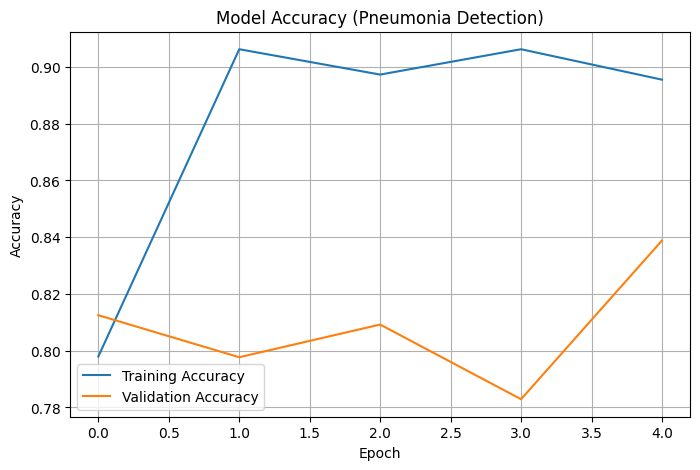


--- Displaying individual predictions ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


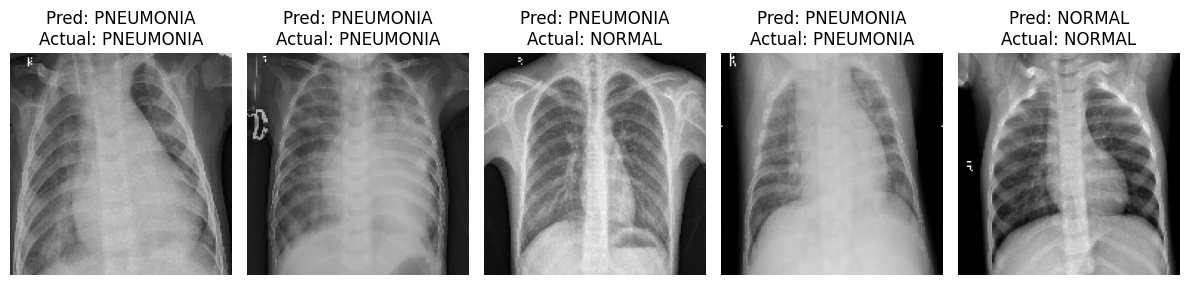

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Set Up File Paths (from your notebook) ---
# !!! These paths must be correct on your computer to work
train_dir = r"C:\Users\niles\Downloads\Pneumonia X Ray-20221031T100017Z-001\Pneumonia X Ray\train"
test_dir = r"C:\Users\niles\Downloads\Pneumonia X Ray-20221031T100017Z-001\Pneumonia X Ray\test"

# --- 2. Create Image Generators ---
IMG_SIZE = (150, 150)
BATCH_SIZE = 32 # Using a standard batch size

# Use data augmentation for the training set (from your notebook)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescale the test set
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the generators from the directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary' # For 'Normal' vs 'Pneumonia'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Get class names from the generator
class_names = list(train_generator.class_indices.keys())
print(f"Found classes: {class_names}") # e.g., ['NORMAL', 'PNEUMONIA']

# --- 3. Define the CNN Model (from your notebook) ---
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid') # Sigmoid for binary (0 or 1) classification
])

# 4. Compile the Model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 5. Train the Model (Corrected steps)
print("\n--- Training the model ---")
history = model.fit(
    train_generator,
    epochs=5, # Minimal epochs for a quick run
    validation_data=test_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE, # Correct calculation
    validation_steps=test_generator.samples // BATCH_SIZE, # Correct calculation
    verbose=1
)

# 6. Plot the Simple Accuracy Graph
print("\n--- Plotting training history ---")
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (Pneumonia Detection)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 7. Test and Display 5 Sample Predictions
print("\n--- Displaying individual predictions ---")

# Get one batch of test images and labels
x_test_batch, y_test_batch = next(test_generator)

# Make predictions on the first 5 images
predictions = model.predict(x_test_batch[:5])
# Convert probabilities (0.0-1.0) to class labels (0 or 1)
predicted_labels = (predictions > 0.5).astype(int).flatten()
actual_labels = y_test_batch[:5].astype(int)

# Set up a 1x5 grid
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    
    # Display the image
    plt.imshow(x_test_batch[i])
    
    # Get the string name for the labels
    pred_name = class_names[predicted_labels[i]]
    actual_name = class_names[actual_labels[i]]
    
    plt.title(f"Pred: {pred_name}\nActual: {actual_name}")
    plt.axis('off')

plt.tight_layout()
plt.show()